# Solver

The evolution of quantum mechanical systems is described by differential
equations like Schroedinger's equation.
(In later sections, we will extend this procedure to stochastic differential
equations and a master equation in Lindblad form, and discuss the
corresponding solver classes.)

The solver class computes the solution to Schroedinger's equation and is
therefore of central importance to the simulation. The equation is given as:


\begin{equation}
i \hbar \partial_t \psi = H \psi
\end{equation}

Lets set $\hbar = 1$ for simplicity.
We can describe a system's evolution by its Hamilton operator.
Then split the Hamilton operator in a drift and a control part

\begin{align*}
H = H_d + H_c,
\end{align*}

where the latter can be written as sum weighted by control amplitudes

\begin{align*}
H_c = \sum_n u_n H_n.
\end{align*}

The drift Hamiltonian describes dynamics which we know about but cannot control,
while the control Hamiltonian describes the contributions which can be changed
dynamically to manipulate the qubit.

Throughout the documentation, we will use a single qubit under Rabi driving
as standard example. Its Hamiltonian with XY-control has the simple form:

\begin{align*}
H = \delta_\omega \sigma_z / 2 + A_x \sigma_x / 2
+ A_y \sigma_y / 2
\end{align*}

where $\delta_\omega$ is the frequency detuning and $A_x$ and $A_y$ the
driving amplitudes. (A derivation is given in the examples section of the
documentation.)
Then we can split the Hamilton operator:

\begin{align*}
H_c &= A_x \sigma_x / 2 + A_y \sigma_y / 2 \\
H_d &= \delta_\omega \sigma_z / 2
\end{align*}

We implement this hamiltonian in qopt by using the dense operator class, which
encapsulates the representation of a matrix with the functionalities of an
operator such as taking the hermitian conjugate, the trace, or calculating
the spectral decomposition.

In [1]:
import numpy as np

from qopt.matrix import DenseOperator

sigma_x = DenseOperator.pauli_x()
sigma_y = DenseOperator.pauli_y()
sigma_z = DenseOperator.pauli_z()

For computational feasibility, we make the assumption of
piece wise constant control and initialize the time steps. (In general they
do not need to be equidistant.)

In [2]:
n_time_steps = 5
total_time = 1

time_steps = (total_time / n_time_steps) * np.ones((n_time_steps, ))

The control Hamiltonian is given as list of operators and has an entry for each
term in the control Hamiltonian. The drift Hamiltonian can either be an empty
list, if the system does not have any drift dynamics, or a list with an entry
for each time step, or a list with a single operator. In the last case this
operator will be used for every time step.

In [3]:
delta_omega = 0

h_ctrl = [.5 * sigma_x, .5 * sigma_y]
h_drift = [delta_omega * .5 * sigma_z]



By setting $\delta_\omega$ to zero, we require the driving to be
exactly resonant.
Then set the control amplitudes to values resulting in an $X_\pi$-Rotation.

In [4]:
control_amplitudes = np.zeros((n_time_steps, len(h_ctrl)))
control_amplitudes[:, 0] = np.pi

Then we initialize a solver for Schroedinger's equation, solve the equation
and plot the corresponding pulse.

Total unitary of the evolution: 
[[0.0000000e+00+0.j 0.0000000e+00-1.j]
 [0.0000000e+00-1.j 4.4408921e-16+0.j]]


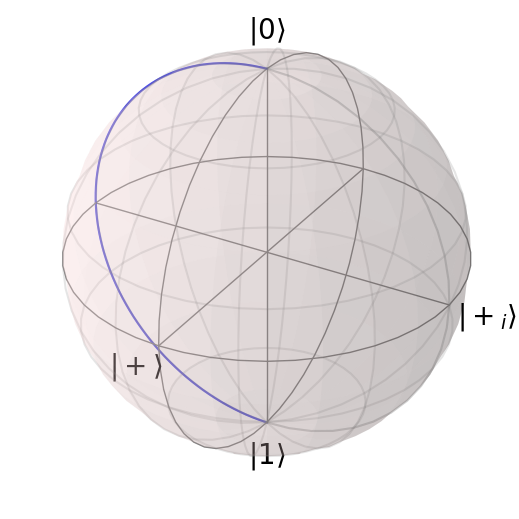

In [5]:
import matplotlib.pyplot as plt
from qopt.solver_algorithms import SchroedingerSolver

solver = SchroedingerSolver(
    h_drift=h_drift,
    h_ctrl=h_ctrl,
    tau=time_steps
)
solver.set_optimization_parameters(control_amplitudes)

print('Total unitary of the evolution: ')
print(solver.forward_propagators[-1].data)

solver.plot_bloch_sphere()
plt.show()